**Individual EDA** - *Aidan Murphy*
--
Consoles

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pdp
sns.set_style("ticks")

In [17]:
def loadCleanFile():
  #this function loads the csv to process it
  rawdata = pd.read_csv("https://github.com/data301-2020-winter2/course-project-group_1019/blob/main/data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv?raw=true.csv") 
  # Preview the basic information of the loaded data 
  print(rawdata.info())
  # Establishing a new dataset that will be dataclean from the rawdata dataset


  #removes the users scores with values tbd
  for rownumber in rawdata.index:
    if rawdata.User_Score[rownumber]== 'tbd':
      rawdata.User_Score[rownumber] = 'NaN'

  dataclean = rawdata.dropna()
  dataclean.index = range(0,len(dataclean.index))

  # Set columns Genre and Rating to be categories and check the info again
  
  dataclean['Name'] = dataclean['Name'].astype("string")
  dataclean['Platform'] = dataclean['Platform'].astype("category")
  dataclean['Year_of_Release'] = dataclean['Year_of_Release'].astype('int64')
  dataclean['Genre'] = dataclean['Genre'].astype('category')
  dataclean['Publisher'] = dataclean['Publisher'].astype("string")
  dataclean['NA_Sales'] = dataclean['NA_Sales'].astype("float")
  dataclean['EU_Sales'] = dataclean['EU_Sales'].astype("float")
  dataclean['JP_Sales'] = dataclean['JP_Sales'].astype("float")
  dataclean['Other_Sales'] = dataclean['Other_Sales'].astype("float")
  dataclean['Global_Sales']= dataclean['Global_Sales'].astype("float")
  dataclean['Critic_Score'] = dataclean['Critic_Score'].astype("float")
  dataclean['Critic_Count'] = dataclean['Critic_Count'].astype("float")
  dataclean['User_Score'] = dataclean['User_Score'].astype("float")
  dataclean['User_Count'] = dataclean['User_Count'].astype("float")
  dataclean['Developer'] = dataclean['Developer'].astype('string')
  dataclean['Rating'] = dataclean['Rating'].astype('category')
  print(dataclean.info())
  return dataclean

def sortconsole(df):  ##removes incomplete values, and sorts by Platform, then by name, only considers the listed columns
    df1 = df.filter(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']).dropna().sort_values(by =['Platform','Name'])
    df1.index = range(0,len(df1.index))
    return df1

def available(df):
  #adds 4 columns with either 1 or 0, if 0 then the game is not available in the region #designated by the column name
  #uses a for loop for each region to see if sales are non-zero
  #
    NA = []
    for i in range(0,len(df.index)):
        if df['NA_Sales'][i] == 0.00:
            NA.append(0)
        else:
            NA.append(1)
    df['NA'] = NA
    
    JP = []
    for i in range(0,len(df.index)):
        if df['JP_Sales'][i] == 0.00:
            JP.append(0)
        else:
            JP.append(1)
    df['JP'] = JP
    
    EU = []
    for i in range(0,len(df.index)):
        if df['EU_Sales'][i] == 0.00:
            EU.append(0)
        else:
            EU.append(1)
    df['EU'] = EU
    
    OTHER = []
    for i in range(0,len(df.index)):
        if df['Other_Sales'][i] == 0.00:
            OTHER.append(0)
        else:
            OTHER.append(1)
    df['OTHER'] = OTHER
    return df



def popular(df):
  # removes consoles with less than 80 games listed
  # takes the value count of the 'Platform' column and takes a slice with rows less than
  #
    counts = df['Platform'].value_counts()
    to_remove = counts[counts <= 80].index
    df = df[~df.Platform.isin(to_remove)]
    return df

## research questions:
 - How many games are available on different consoles?
 - Are publishers fixed to one console, or how much do they vary?
 - Other differences between data for different consoles
 
### Basic description:
The raw data was obtained from [kaggle]("https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings"), and is a user compiled data set which extends a scrape already performed by Metacritic. It includes over 16,000 entries, of which ~6,900 have all aspects complete. Each entry features a videogame and the console/platform it was released on, and entries include release dates from 1980 to 2016. As the extracted information will show, this dataset is likely not complete, and once incomplete entries are removed, it is very much a random selection of games from the 80's to the mid 2010's.
 

In [18]:
##import data and perform basic cleaning (i.e, removing unwanted columns and adding new columns)

df = loadCleanFile()
df = available(sortconsole(df))
print(len(df.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


<ipython-input-17-febaa93772b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata.User_Score[rownumber] = 'NaN'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             6825 non-null   string  
 1   Platform         6825 non-null   category
 2   Year_of_Release  6825 non-null   int64   
 3   Genre            6825 non-null   category
 4   Publisher        6825 non-null   string  
 5   NA_Sales         6825 non-null   float64 
 6   EU_Sales         6825 non-null   float64 
 7   JP_Sales         6825 non-null   float64 
 8   Other_Sales      6825 non-null   float64 
 9   Global_Sales     6825 non-null   float64 
 10  Critic_Score     6825 non-null   float64 
 11  Critic_Count     6825 non-null   float64 
 12  User_Score       6825 non-null   float64 
 13  User_Count       6825 non-null   float64 
 14  Developer        6825 non-null   string  
 15  Rating           6825 non-null   category
dtypes: category(3), float64(9), int64(1), stri

<ipython-input-17-febaa93772b2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Name'] = dataclean['Name'].astype("string")
<ipython-input-17-febaa93772b2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Platform'] = dataclean['Platform'].astype("category")
<ipython-input-17-febaa93772b2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

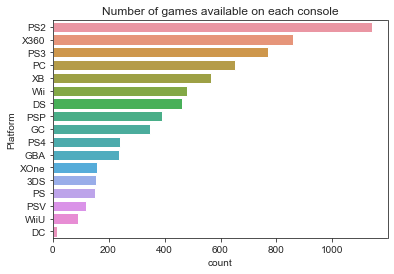

In [19]:

plot = sns.countplot(y = 'Platform',data = df,order = df['Platform'].value_counts().index).set_title("Number of games available on each console")

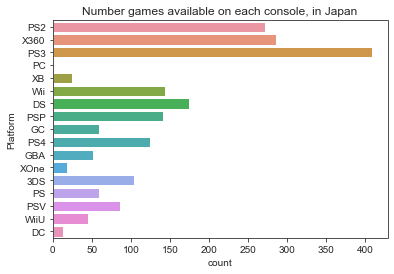

In [20]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.JP < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Japan")

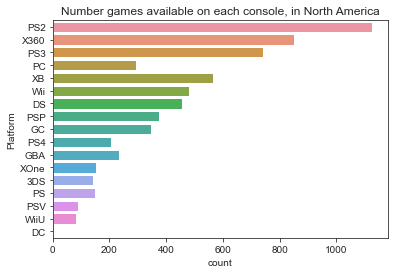

In [21]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.NA < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in North America")

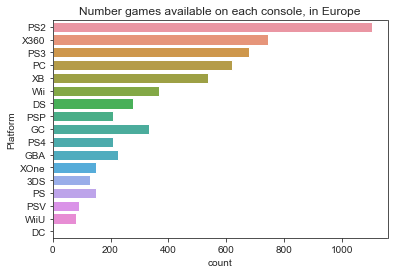

In [22]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.EU < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Europe")

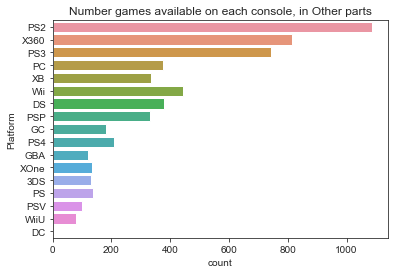

In [23]:
plot = sns.countplot(y = 'Platform',data = df.drop(df[df.OTHER < 1].index ), order = df['Platform'].value_counts().index).set_title("Number games available on each console, in Other parts")


### available games on each console
It would seem that all over the world the 3 consoles with the largest selection of games would be the PS2, followed by the Xbox 360, and then the ps3. And then there are minor differences after that.
Something interesting to note is that Japan supposedly has 0 games available on PC which suggests that gaming on a computer is either non-existent or that not all games sales are accounted for; most likely the latter.
These graphs also show that data relating to these consoles may vary from region to region, which is most prominently seen in japan, where the availability of games for consoles is very polarised:
 - a large selection of games
 - a limited selection of games

we can also see that there are few games available on the DreamCast (DC), so I have written a function to remove consoles with fewer than 80 games available worldwide (this should affect only the dreamcast). see popular(df)

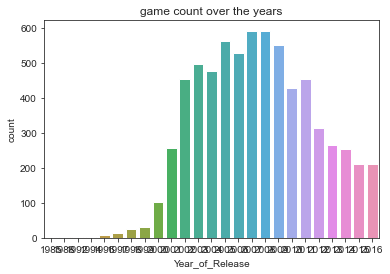

In [24]:
plot = sns.countplot(x = 'Year_of_Release',data = df).set_title("game count over the years")


This is a just a general idea for the distribution of games over the years

In [25]:
df = popular(df)

## Global Sales for each console
We are basically summing the global sales for every game available to a console, to give a rough estimate as to which games console is the most economically productive. This is very much partial to the number of games made for each console, which is affected by how long the console is available and at what point games are no longer released for the console. The critic's reception of previous games on the console can also create a bias towards the current games availabe and have a negative affect on the market; so we should try to see if there is some correlation between the critic score and global sales of a game. 

Again this is a just a culmination of the sales for each game on each console worldwide:

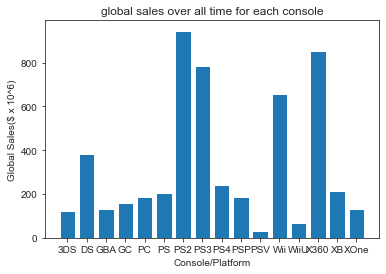

In [26]:
globalSales = {i : 0 for i in df.Platform.unique()} ##makes a dictionary with consoles, for the global sales of games on the console
for i in list(df.Platform.unique()):
    for j in df.index:
        if (df['Platform'][j] == i):
            globalSales[i] += df['Global_Sales'][j]

            
            
vert = list(globalSales.values())
plt.bar(x = list(range(0,len(df.Platform.unique()))), height = vert)
plt.title('global sales over all time for each console')
plt.xlabel('Console/Platform')
plt.ylabel('Global Sales($ x 10^6)')
plt.xticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))

plt.show()

## individual consoles
as stated for the global sales, the above information is partial to many things, and as such not very useful when trying to look at relationships between particular variables. This problem can be overcome by normalizing our data with respect to whatever variables we are not testing or comparing. In order to do this we can make a dictionary with the unique platforms as keys and then extract information about each console as necessary to more accurately compare the relationships between certain variables.

In [27]:
dfConsole = {i : df.drop(df[df.Platform != i].index ) for i in list(df.Platform.unique())}

Now 'consoleStats' is a dictionary which contains the mean values of the columns for each console, so you can access the mean values of a column x for a console y as follows:

consoleStats[y][x]

and it should display a float:

In [77]:
consoleStats = {i : {dfConsole[i].mean().keys()[j] : dfConsole[i].mean()[j] for j in range(len(dfConsole[i].mean()))} for i in dfConsole}
print(consoleStats['PS3']['JP'])
print(consoleStats['PS3']['Year_of_Release'])

0.5305591677503251
2010.0910273081925


The above number indicates that 53% of all listed PS3 games listed, had a least one purchase in Japan, and that the average year of release for a PS3 game was in 2010.

Let's look at the average year of release for each of these consoles:

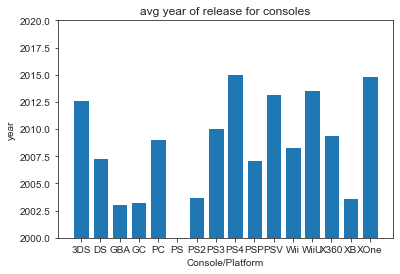

In [86]:
avgyear = {i : consoleStats[i]['Year_of_Release'] for i in list(df.Platform.unique())}

vert = list(avgyear.values())
plt.bar(x = list(range(0,len(df.Platform.unique()))), height = vert)
plt.gca().set_ylim([2000,2020])
plt.title('avg year of release for consoles')
plt.xlabel('Console/Platform')
plt.ylabel('year')
plt.xticks(list(range(0,len(df.Platform.unique()))), list(df.Platform.unique()))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000141E6458B50>, <matplotlib.lines.Line2D object at 0x00000141E64587C0>, <matplotlib.lines.Line2D object at 0x00000141E6470580>, <matplotlib.lines.Line2D object at 0x00000141E644B3A0>, <matplotlib.lines.Line2D object at 0x00000141E644F3D0>, <matplotlib.lines.Line2D object at 0x00000141E644F730>, <matplotlib.lines.Line2D object at 0x00000141E64CE760>, <matplotlib.lines.Line2D object at 0x00000141E64CE190>, <matplotlib.lines.Line2D object at 0x00000141E63D9130>, <matplotlib.lines.Line2D object at 0x00000141E63D9B50>, <matplotlib.lines.Line2D object at 0x00000141E78A9BE0>, <matplotlib.lines.Line2D object at 0x00000141E78A9DC0>, <matplotlib.lines.Line2D object at 0x00000141E7895B20>, <matplotlib.lines.Line2D object at 0x00000141E78956D0>, <matplotlib.lines.Line2D object at 0x00000141E7898250>, <matplotlib.lines.Line2D object at 0x00000141E78983A0>, <matplotlib.lines.Line2D object at 0x00000141E655E1F0>, <matplotlib.lines.Line2D object at

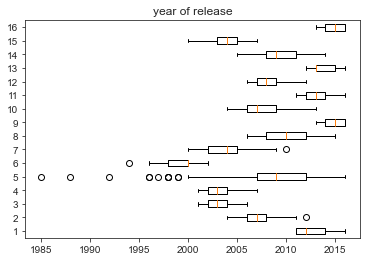

In [108]:

data = list(dfConsole[i]['Year_of_Release'] for i in df.Platform.unique())
fig1, ax1 = plt.subplots()
ax1.set_title('year of release')
x = ax1.boxplot(data, vert = False)
print(x)